In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from google.colab import drive, files
import io

In [93]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_without_label.csv') ##Este no es el test que se usa para entrenar.

# 1. Análisis de datos


In [ ]:
train.columns

Index(['id', 'tweet', 'label'], dtype='object')

In [ ]:
train.info

<bound method DataFrame.info of         id                                              tweet label
0        1  Chinese converting to Islam after realising th...  fake
1        2  11 out of 13 people (from the Diamond Princess...  fake
2        3  COVID-19 Is Caused By A Bacterium, Not Virus A...  fake
3        4  Mike Pence in RNC speech praises Donald Trump’...  fake
4        5  6/10 Sky's @EdConwaySky explains the latest #C...  real
...    ...                                                ...   ...
8555  8556  A tiger tested positive for COVID-19 please st...  fake
8556  8557  ???Autopsies prove that COVID-19 is??� a blood...  fake
8557  8558  _A post claims a COVID-19 vaccine has already ...  fake
8558  8559  Aamir Khan Donate 250 Cr. In PM Relief Cares Fund  fake
8559  8560  It has been 93 days since the last case of COV...  real

[8560 rows x 3 columns]>

In [ ]:
##confirmar nulos train.isnull().mean()

## Transformamos los datos en String:

In [4]:
train['id'] = train['id'].astype(str)
train['tweet'] = train['tweet'].astype(str)
train['label'] = train['label'].astype(str)
##train['short_description'] = train['short_description'].astype(str)

## Información interesante del df:

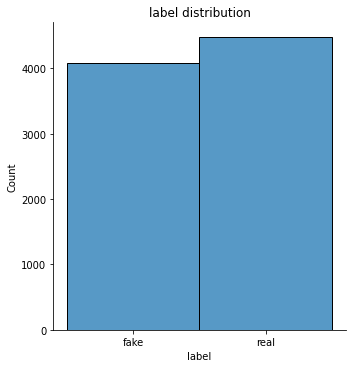

In [ ]:
sns.displot(train["label"]);
plt.title("label distribution");

In [ ]:
##Si pandas_profiling funciona mal:
##!pip install pandas-profiling==2.7.1
##!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(train)

profile

### Sacamos el Id reptido


In [5]:
train.drop(['id'], axis=1)
train.set_index("id", inplace = True)

In [ ]:
train

,tweet,label
id,,
1,Chinese converting to Islam after realising th...,fake
2,11 out of 13 people (from the Diamond Princess...,fake
3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",fake
4,Mike Pence in RNC speech praises Donald Trump’...,fake
5,6/10 Sky's @EdConwaySky explains the latest #C...,real
...,...,...
8556,A tiger tested positive for COVID-19 please st...,fake
8557,???Autopsies prove that COVID-19 is??� a blood...,fake
8558,_A post claims a COVID-19 vaccine has already ...,fake


In [ ]:
## Agregar columnas y sacar largo de string
##train['Tweet lenght'] = train["tweet"].str.len()
##train.columns.append("Length", int);

# 2. Train y Validation

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_validation, Y_train, Y_validation = train_test_split(
    train.drop('label', axis=1),
    train['label'],
    test_size=(1.0/3), random_state=42)

print(f'X_Data shape = {train.shape}')
print(f'X_train shape = {X_train.shape}\n{X_train.head()}\n------------------------')
print(f'Y_train shape = {Y_train.shape}\n{Y_train.head()}\n------------------------')
print(f'X_test shape = {X_validation.shape}\n{X_validation.head()}\n------------------------')
print(f'Y_test shape = {Y_validation.shape}\n{Y_validation.head()}')

In [ ]:
#https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/



##skf= StratifiedKFold(5, shuffle=true,random_state=1)
##cross_val_score(clf,x_clf,y_clf,cv=skf,scoring='accuracy')

In [ ]:
X_train

# 3. Preprocesamiento básico

In [33]:
X_train["tweet"] = X_train["tweet"].astype(str)

In [ ]:
#X_train["tweet"]

## Fit

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
bag_of_words_train = count_vectorizer.fit(X_train["tweet"])

In [35]:
print(bag_of_words_train.get_feature_names())

['00', '000', '000waoe6e1', '00ice', '00pm', '01', '01ododggyq', '02', '03', '033', '03hguvcatu', '03kvl3ooxu', '04', '04051952n', '047lsdtrqn', '04dpqpumxs', '04jepehxp7', '04piswidhw', '05', '054', '05am', '06', '062454254', '063661060', '0651', '07', '0710', '08', '0800', '0840hh9nbs', '0881911', '09', '093020408', '0940', '09kofbfifk', '0b55tnqvrh', '0cbk5ykv94', '0clnmzaynm', '0d5kvrnvbe', '0d99flmeyc', '0dajqm41hi', '0djnh0rtwn', '0epqswpgfv', '0esau03igl', '0exkc1kf1h', '0fwlwa8ves', '0gmvqqb9hb', '0go5izgiqf', '0h81pytnx9', '0hb3bfjoaf', '0hggjzunp3', '0imiyqykyv', '0kh7uorfvy', '0kpfvguj2a', '0l4jnllcox', '0leqxe1cuv', '0lgnecszo9', '0lmzr3kqn4', '0lnm4htcci', '0nfuq0jjds', '0oecvtuvcd', '0pejdsy3pg', '0pgdjkgdbk', '0pp491sxk1', '0q7vqp', '0qdoewhbbw', '0rarygxc94', '0rqv4ygoqr', '0rspydensl', '0sw9dsfsim', '0t6fshc3pa', '0tqe2ct3zj', '0tshdj79rg', '0ueqyllcna', '0vhhd4ufv9', '0vqwfwrb7d', '0vrcpdzjjs', '0wgnlj1n6h', '0whwe3fe4v', '0x4xey1iiz', '0yvdxbj3ww', '0zaernrbqd', '0zq

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Transform

In [36]:
bag_of_words_train = count_vectorizer.transform(X_train["tweet"])
bag_of_words_train = pd.DataFrame(bag_of_words_train.toarray(), columns = count_vectorizer.get_feature_names())

In [ ]:
bag_of_words_train

# 4. Aprendizaje supervisado - Arbol

In [38]:
from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier(criterion = 'entropy', max_depth=4, random_state=42)
arbol = arbol.fit(bag_of_words_train, Y_train)

## Predicción validation

In [39]:
bag_of_words_test = count_vectorizer.transform(X_validation["tweet"])

In [40]:
from sklearn.metrics import accuracy_score
Y_pred = arbol.predict(bag_of_words_test)
print(accuracy_score(Y_pred,Y_validation))

0.7929222144358795


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


## Predicción Test

In [94]:
test.columns

Index(['id', 'tweet'], dtype='object')

In [ ]:
test['id'].astype('str')
test['tweet'].astype('str')

In [69]:
##test.drop(['id'], axis=1)
##test.set_index("id", inplace = True)

In [ ]:
test.info
#test["tweet"]

In [95]:
test_bag = count_vectorizer.transform(test["tweet"])

In [96]:
test_bag = pd.DataFrame(test_bag.toarray(), columns = count_vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [100]:
test_prediction = arbol.predict(test_bag)

##prediction = pd.DataFrame()
##prediction['label'] = test_prediction

prediction = pd.DataFrame(test_prediction, columns=['label'])
prediction.index += 1
prediction = prediction.to_csv('prediction.csv')

In [101]:
from google.colab import files

files.download('prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>